In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#read files

city= pd.read_csv(r'C:\Users\sanju\OneDrive\Desktop\excel and power bi practice\product analytics\dim_cities.csv',encoding= 'unicode escape')
city.head()

,City_ID,City,Tier
0,CT111,Delhi,Tier 1
1,CT112,Mumbai,Tier 1
2,CT113,Bangalore,Tier 1
3,CT114,Chennai,Tier 1
4,CT115,Kolkata,Tier 2


In [3]:
respondent= pd.read_csv(r'C:\Users\sanju\OneDrive\Desktop\excel and power bi practice\product analytics\dim_repondents.csv')
respondent.head()

,Respondent_ID,Name,Age,Gender,City_ID
0,120031,Aniruddh Issac,15-18,Female,CT117
1,120032,Trisha Rout,19-30,Male,CT118
2,120033,Yuvraj Virk,15-18,Male,CT116
3,120034,Pranay Chand,31-45,Female,CT113
4,120035,Mohanlal Joshi,19-30,Female,CT120


In [4]:
survy_response = pd.read_csv(r'C:\Users\sanju\OneDrive\Desktop\excel and power bi practice\product analytics\fact_survey_responses.csv')
survy_response.head()

,Response_ID,Respondent_ID,Consume_frequency,Consume_time,Consume_reason,Heard_before,Brand_perception,General_perception,Tried_before,Taste_experience,...,Improvements_desired,Ingredients_expected,Health_concerns,Interest_in_natural_or_organic,Marketing_channels,Packaging_preference,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations
0,103001,120031,2-3 times a week,To stay awake during work/study,Increased energy and focus,Yes,Neutral,Not sure,No,5,...,Reduced sugar content,Guarana,No,Yes,TV commercials,Compact and portable cans,Yes,50-99,Supermarkets,Studying/working late
1,103002,120032,2-3 times a month,Throughout the day,To boost performance,No,Neutral,Not sure,No,5,...,More natural ingredients,Caffeine,Yes,Not Sure,Print media,Compact and portable cans,No,50-99,Supermarkets,Sports/exercise
2,103003,120033,Rarely,Before exercise,Increased energy and focus,No,Neutral,Not sure,No,2,...,More natural ingredients,Caffeine,No,Yes,Online ads,Innovative bottle design,Not Sure,100-150,Supermarkets,Studying/working late
3,103004,120034,2-3 times a week,To stay awake during work/study,To boost performance,No,Positive,Dangerous,Yes,5,...,Other,Caffeine,No,Yes,Online ads,Compact and portable cans,No,Above 150,Supermarkets,Sports/exercise
4,103005,120035,Daily,To stay awake during work/study,Increased energy and focus,Yes,Neutral,Effective,Yes,5,...,More natural ingredients,Caffeine,Yes,Yes,Online ads,Compact and portable cans,Yes,100-150,Online retailers,Studying/working late


## data cleaning

In [5]:
print("shape of city dataframe:",city.shape)
print("shape of respondent dataframe:",respondent.shape)
print("shape of survey responses dataframe:",survy_response.shape)

shape of city dataframe: (10, 3)
shape of respondent dataframe: (10000, 5)
shape of survey responses dataframe: (10000, 23)


In [6]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   City_ID  10 non-null     object
 1   City     10 non-null     object
 2   Tier     10 non-null     object
dtypes: object(3)
memory usage: 372.0+ bytes


In [7]:
respondent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Respondent_ID  10000 non-null  int64 
 1   Name           10000 non-null  object
 2   Age            10000 non-null  object
 3   Gender         10000 non-null  object
 4   City_ID        10000 non-null  object
dtypes: int64(1), object(4)
memory usage: 390.8+ KB


In [8]:
survy_response.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Response_ID                     10000 non-null  int64 
 1   Respondent_ID                   10000 non-null  int64 
 2   Consume_frequency               10000 non-null  object
 3   Consume_time                    10000 non-null  object
 4   Consume_reason                  10000 non-null  object
 5   Heard_before                    10000 non-null  object
 6   Brand_perception                10000 non-null  object
 7   General_perception              10000 non-null  object
 8   Tried_before                    10000 non-null  object
 9   Taste_experience                10000 non-null  int64 
 10  Reasons_preventing_trying       10000 non-null  object
 11  Current_brands                  10000 non-null  object
 12  Reasons_for_choosing_brands     10000 non-null 

In [9]:
#check null values
city.isnull().sum()

City_ID    0
City       0
Tier       0
dtype: int64

In [10]:
respondent.isnull().sum()

Respondent_ID    0
Name             0
Age              0
Gender           0
City_ID          0
dtype: int64

In [11]:
survy_response.isnull().sum()

Response_ID                       0
Respondent_ID                     0
Consume_frequency                 0
Consume_time                      0
Consume_reason                    0
Heard_before                      0
Brand_perception                  0
General_perception                0
Tried_before                      0
Taste_experience                  0
Reasons_preventing_trying         0
Current_brands                    0
Reasons_for_choosing_brands       0
Improvements_desired              0
Ingredients_expected              0
Health_concerns                   0
Interest_in_natural_or_organic    0
Marketing_channels                0
Packaging_preference              0
Limited_edition_packaging         0
Price_range                       0
Purchase_location                 0
Typical_consumption_situations    0
dtype: int64

No null values are present in the dataset.

In [12]:
#check duplicate values

print("Duplicate values in the city dataframe:",city.duplicated().sum())
print("Duplicate values in the Respondent dataframe:",respondent.duplicated().sum())
print("Duplicate values in the Survey responses dataframe:",survy_response.duplicated().sum())

Duplicate values in the city dataframe: 0
Duplicate values in the Respondent dataframe: 0
Duplicate values in the Survey responses dataframe: 0


Any duplicate values are not present in the dataset.


In [13]:
#statistics of the dataset
city.describe()

,City_ID,City,Tier
count,10,10,10
unique,10,10,2
top,CT111,Delhi,Tier 1
freq,1,1,5


In [14]:
respondent.describe()

,Respondent_ID
count,10000.00000
mean,125030.50000
std,2886.89568
min,120031.00000
25%,122530.75000
50%,125030.50000
75%,127530.25000
max,130030.00000


In [15]:
survy_response.describe()

,Response_ID,Respondent_ID,Taste_experience
count,10000.00000,10000.00000,10000.000000
mean,108000.50000,125030.50000,3.281900
std,2886.89568,2886.89568,1.239752
min,103001.00000,120031.00000,1.000000
25%,105500.75000,122530.75000,2.000000
50%,108000.50000,125030.50000,3.000000
75%,110500.25000,127530.25000,4.000000
max,113000.00000,130030.00000,5.000000


## Data Analysis  

### Demographic insights

### 1.Who prefers energy drink more? (male/female/ non- binary)

In [16]:
survy_response['Consume_frequency'].unique()

array(['2-3 times a week', '2-3 times a month', 'Rarely', 'Daily',
       'Once a week'], dtype=object)

In [17]:
prefers= survy_response.groupby('Consume_frequency').get_group('Daily')
df= pd.merge(respondent, prefers,on= 'Respondent_ID', how= 'inner')
gender= df['Gender'].value_counts()
gender

Male          817
Female        466
Non-binary     63
Name: Gender, dtype: int64

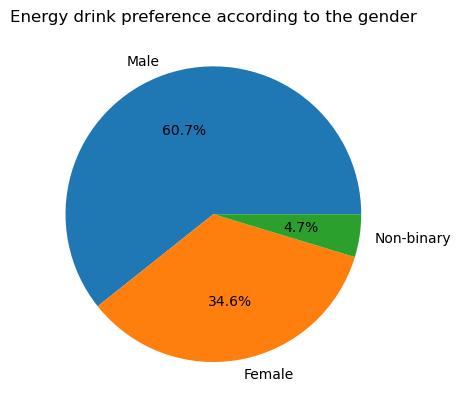

In [18]:
plt.title('Energy drink preference according to the gender')
plt.pie(gender, labels=gender.index,autopct= '%1.1f%%')

plt.show()

Insight: Preference of energy drinks is more in Males than others.

### b. Which age group prefers energy drinks more?

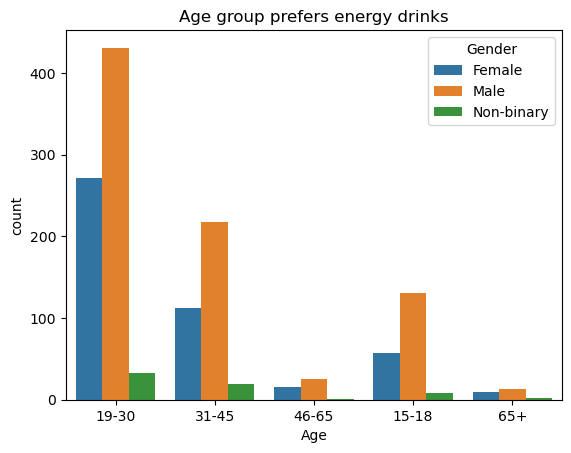

In [19]:
age= respondent[['Respondent_ID','Age','Gender']]
df2= pd.merge(prefers,age, on= 'Respondent_ID', how= 'inner')

sns.countplot(x='Age', hue='Gender',data= df2)
plt.title('Age group prefers energy drinks')
plt.show()

insight: The age-group that prefers energy drinks is 19-30 more than other age groups and moreover preference of energy drinks is more by male in all age-groups.

### c. Which type of marketing reaches the most Youth (15-30)?

In [20]:
respondent['Age'].unique()

array(['15-18', '19-30', '31-45', '46-65', '65+'], dtype=object)

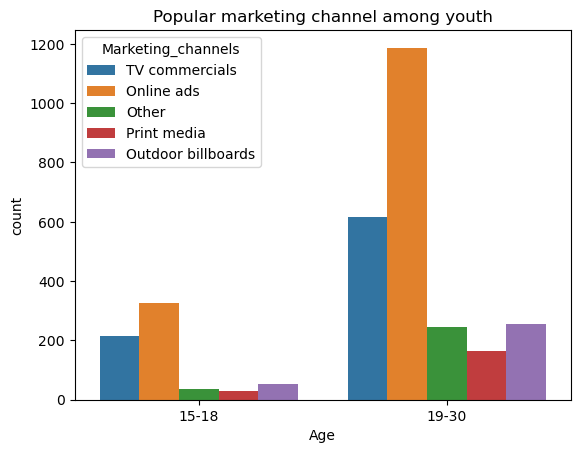

In [21]:
heard= survy_response.groupby('Heard_before').get_group('Yes')
age1=respondent[(respondent['Age']=='15-18')|(respondent['Age']=='19-30')]
df1=pd.merge(heard,age1,how='inner')

sns.countplot(x='Age',hue='Marketing_channels', data=df1)
plt.title('Popular marketing channel among youth')
plt.show()

insights: Most of the customers among age-group 15-30 have heard about the brand through online ADs. Second popular marketing channel is tv commercials.

## 2. Consumer Preferences

### a. What are the preferred ingredients of energy drinks among respondents?

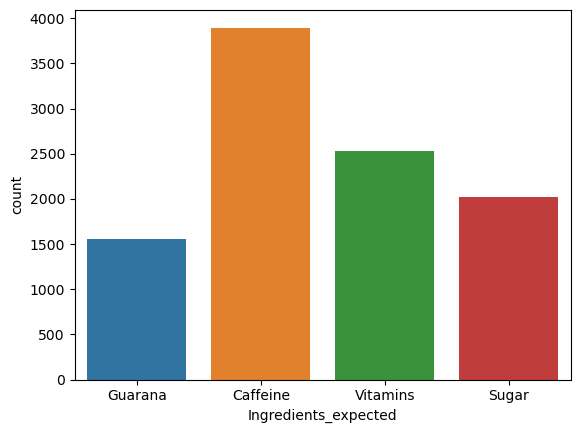

In [22]:
sns.countplot(x='Ingredients_expected', data= survy_response)
plt.show()

Insights: Most preferred ingredients of energy drinks is Caffeine.

### b. What packaging preferences do respondents have for energy drinks?

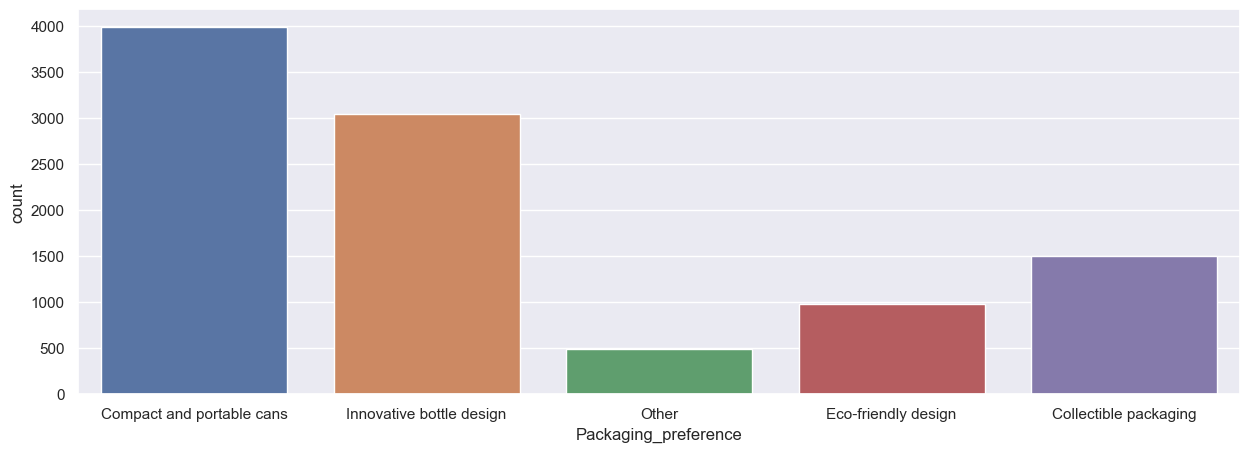

In [23]:
sns.set(rc={'figure.figsize':(15,5)})
sns.countplot(x='Packaging_preference', data= survy_response)
plt.show()

Insights: Compact and portable cans are the most preferred package. Innovative bottle design are the second most preferred package.

### 3. Competition Analysis

### a. Who are the current market leaders?

Cola-Coka    2538
Bepsi        2112
Gangster     1854
Blue Bull    1058
CodeX         980
Sky 9         979
Others        479
Name: Current_brands, dtype: int64
****************************************


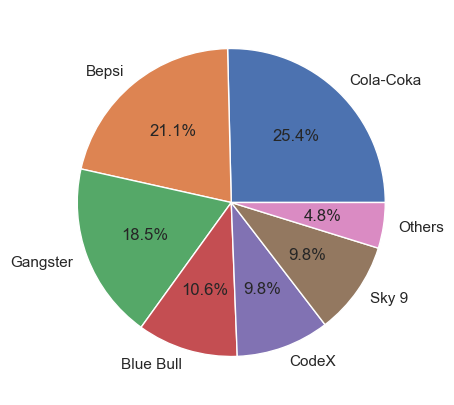

In [24]:
market_leaders= survy_response['Current_brands'].value_counts()
print(market_leaders)
print('**'*20)
plt.pie(market_leaders,autopct='%1.1f%%',labels= market_leaders.index)
plt.show()

Insights: Cola coka has 25% market-share, Bepsi has 21% market-share and CodeX holds 9% market-share.

### b. What are the primary reasons consumers prefer those brands over ours?

In [25]:
survy_response['Reasons_for_choosing_brands'].unique()

array(['Availability', 'Other', 'Brand reputation', 'Effectiveness',
       'Taste/flavor preference'], dtype=object)

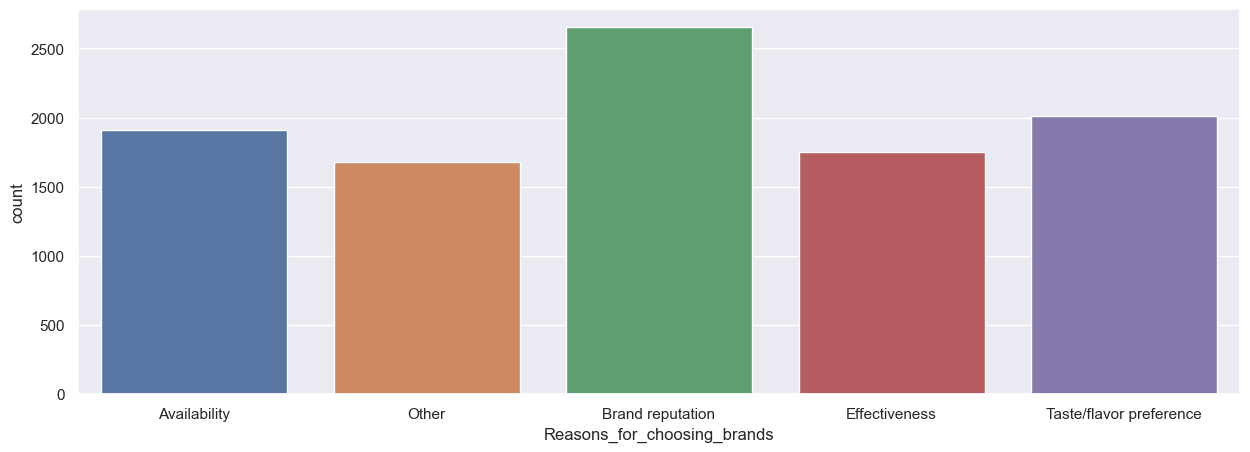

In [26]:
sns.countplot(x='Reasons_for_choosing_brands', data= survy_response)
plt.show()

Insights: The primary reasons consumers prefer those brands over ours is their Brand reputation 

## 4. Marketing Channels and Brand Awareness 

### 4. Which marketing channel can be used to reach more customers?

In [27]:
reach_customers= survy_response['Marketing_channels'].value_counts()
reach_customers

Online ads            4020
TV commercials        2688
Outdoor billboards    1226
Other                 1225
Print media            841
Name: Marketing_channels, dtype: int64

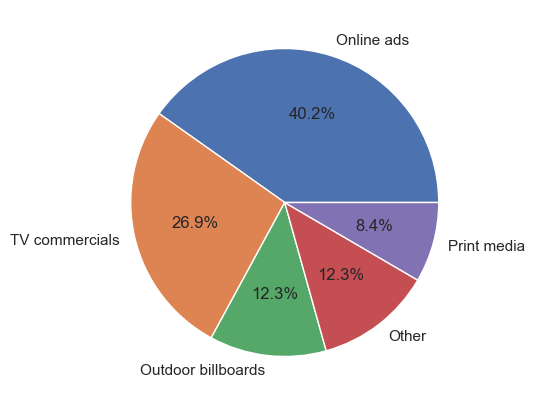

In [28]:
plt.pie(reach_customers, autopct='%1.1f%%', labels= reach_customers.index)
plt.show()

Insights: Online ads and Tv commercials can be used to reach a lot customers. Print media is the under performing marketing channel.

### b. How effective are different marketing strategies and channels in reaching our customers?

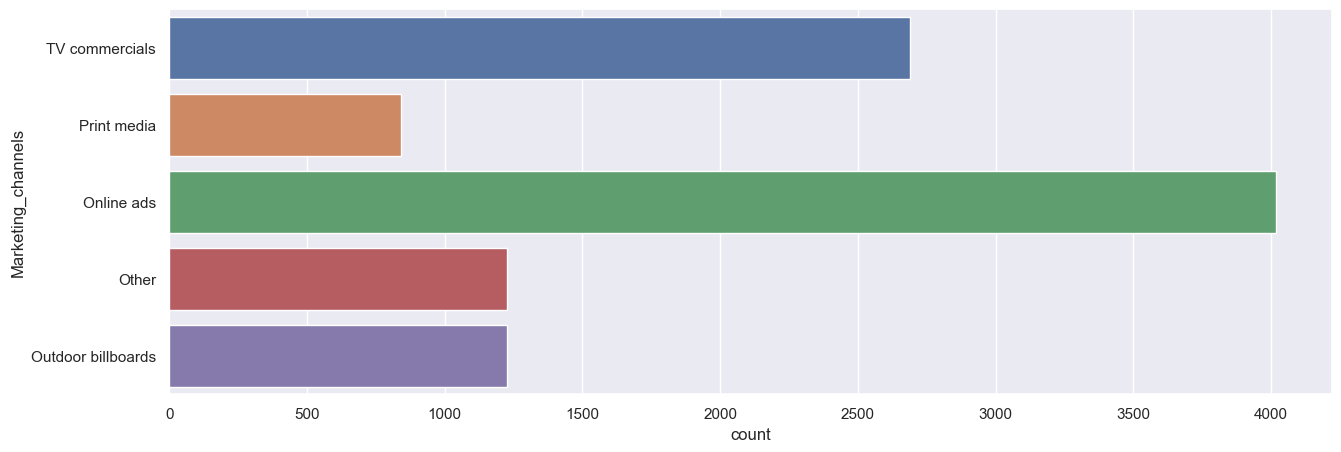

In [33]:
sns.countplot(y='Marketing_channels', data =survy_response)
plt.show()

Insights: Online ads are best channel to reach the target Audience of the energy drinks i.e the youths of age group (15-30).
Tv commercials are also good channel to generate brand awareness among customers of other age groups.

## 5. Brand Penetration:

### a. What do people think about our brand? (overall rating)

Rating: Count of responders
3    2957
4    2479
5    1986
2    1524
1    1054
Name: Taste_experience, dtype: int64
****************************************


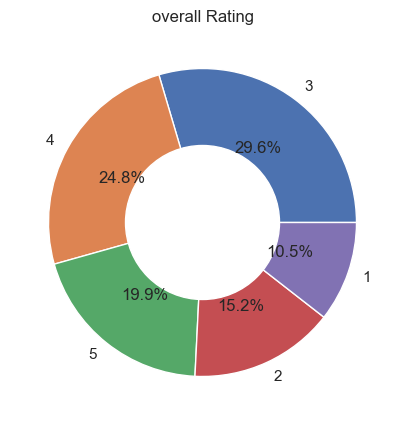

In [29]:
rating= survy_response['Taste_experience'].value_counts()
print('Rating: Count of responders')
print(rating)
print('**'*20)
plt.title('overall Rating')
plt.pie(rating,autopct='%1.1f%%',labels= rating.index, radius=1)
circle= plt.Circle((0,0),radius=0.5 ,color='white')
c= plt.gcf()
c.gca().add_artist(circle)

plt.show()

Insights: 29% of customers have given 3 rating, 24% customers have given 4 rating and 19% of customers have given 5 rating.
Overall most of the customers think its an average product.

## 6. Purchase Behavior

### a. Where do respondents prefer to purchase energy drinks?


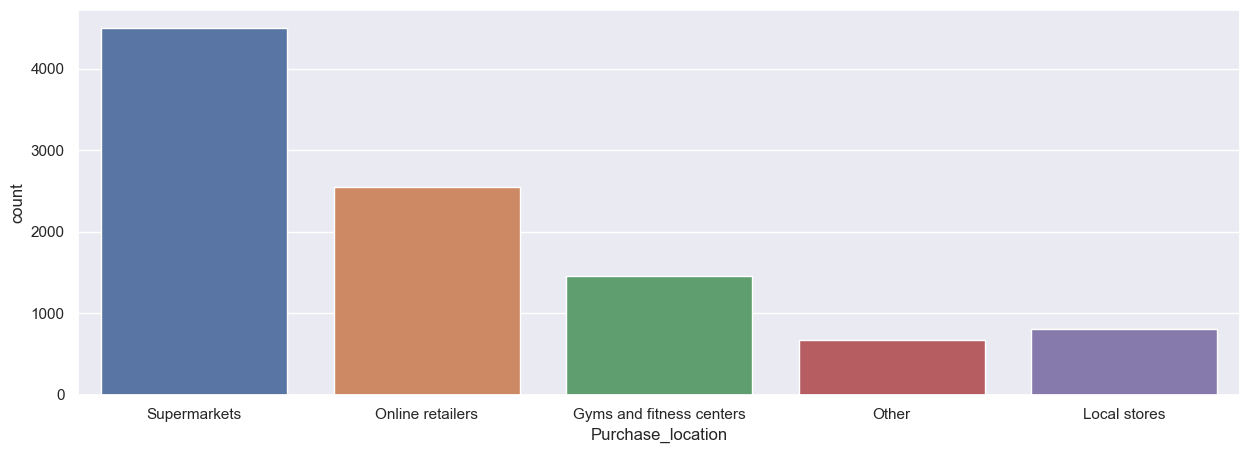

In [30]:
sns.countplot(x='Purchase_location',data= survy_response)
plt.show()

Insights: Mostly respondents purchase from Supermarkets.

### b. What are the typical consumption situations for energy drinks among respondents?

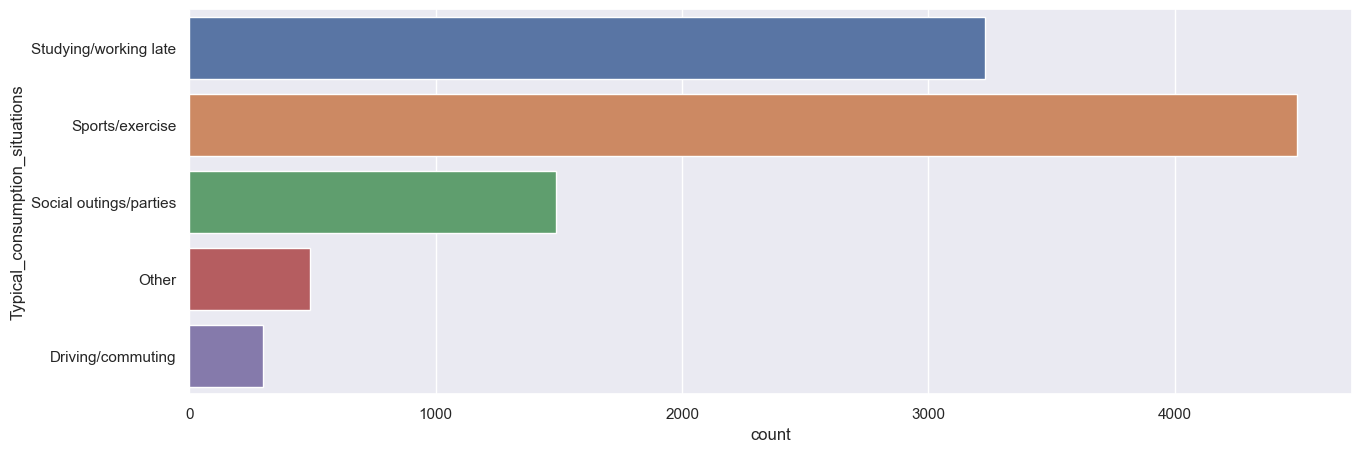

In [31]:
sns.countplot(y='Typical_consumption_situations',data= survy_response)
plt.show()

Insights: Respondents typically consume energy drinks while exercising or playing any sports.

### c. What factors influence respondents' purchase decisions, such as price range and limited edition packaging?

In [32]:
df=survy_response['Price_range']
a=df.value_counts()
b=df.value_counts()/survy_response.shape[0]*100
print(b)
print('*'*25)
df1=survy_response['Limited_edition_packaging']
c=df1.value_counts()
d=df1.value_counts()/survy_response.shape[0]*100
print(d)

50-99        42.88
100-150      31.42
Above 150    15.61
Below 50     10.09
Name: Price_range, dtype: float64
*************************
No          40.23
Yes         39.46
Not Sure    20.31
Name: Limited_edition_packaging, dtype: float64


i) Data shows nearly 75% of people thinks price between 50 to 150. 
ii) It is very hard to say that 'Limited edition packing ' has any influence on sale
because approx 40% said Yes and no and 20% of people not sure so it is impossible to conclude without having
additional information.

## 7. Product Development

### a. Which area of business should we focus more on our product development? (Branding/taste/availability)

Branding: According to the analysis, customers mostly prefer other drinks over CodeX because of Brand reputation of other brands.
